In [1]:
import geopandas as geopd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np

In [2]:
df = geopd.read_file("data/geo/sp_setores_censitarios.geojson", encoding='iso-8859-1')
print(df.shape)
df.head()

(68296, 15)


,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE S�O PAULO,354100005001,Boqueir�o,1,"MULTIPOLYGON (((-46.41024 -24.01103, -46.41170..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE S�O PAULO,354100005001,Boqueir�o,2,"MULTIPOLYGON (((-46.41606 -24.00245, -46.41598..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE S�O PAULO,354100005001,Boqueir�o,3,"MULTIPOLYGON (((-46.41213 -24.00792, -46.41244..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE S�O PAULO,354100005001,Boqueir�o,4,"MULTIPOLYGON (((-46.41134 -24.00552, -46.41197..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE S�O PAULO,354100005001,Boqueir�o,5,"MULTIPOLYGON (((-46.41326 -24.00514, -46.41484..."


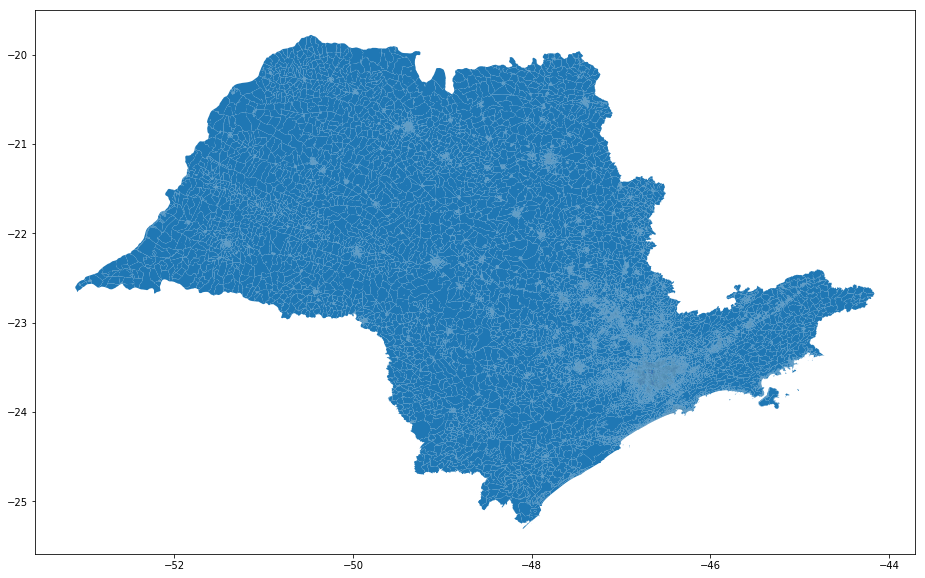

In [3]:
df.plot(figsize=(20,10))

In [4]:
df = df[df.NM_MUNICIP== 'S�O PAULO']

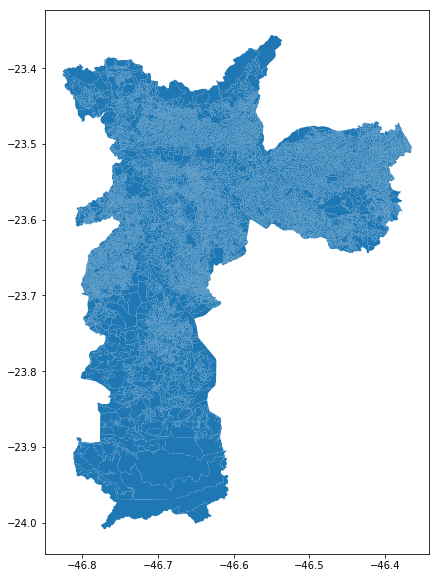

In [5]:
df.plot(figsize=(20,10))

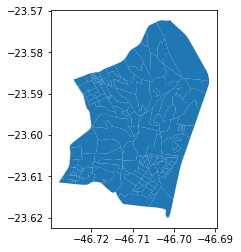

In [6]:
df[df['NM_DISTRIT'] == 'MORUMBI'].plot()

## Add análise geoeconômica

### Load dados de renda do IBGE

In [7]:
df_renda = pd.read_csv('data/censo-sp/CSV/Basico_SP1.csv', sep=';', encoding="iso-8859-1")
print(df_renda.shape)
df_renda.head()

(18363, 34)


,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


In [8]:
df_renda.dropna(subset=['V005'], inplace=True)
df_renda.shape

(18333, 34)

In [9]:
df_renda.dtypes

Cod_setor                int64
Cod_Grandes Regiões      int64
Nome_Grande_Regiao      object
Cod_UF                   int64
Nome_da_UF              object
Cod_meso                 int64
Nome_da_meso            object
Cod_micro                int64
Nome_da_micro           object
Cod_RM                   int64
Nome_da_RM              object
Cod_municipio            int64
Nome_do_municipio       object
Cod_distrito             int64
Nome_do_distrito        object
Cod_subdistrito          int64
Nome_do_subdistrito     object
Cod_bairro               int64
Nome_do_bairro          object
Situacao_setor           int64
Tipo_setor               int64
V001                   float64
V002                   float64
V003                    object
V004                    object
V005                    object
V006                    object
V007                    object
V008                    object
V009                    object
V010                    object
V011                    object
V012    

### Transforma campo de renda em numérico

In [10]:
df_renda['V005'] = df_renda['V005'].str.replace(',','.')
df_renda['V005'] = pd.to_numeric(df_renda['V005'])

### remove outliers

In [11]:
df_renda.shape

(18333, 34)

In [12]:
df_renda = df_renda[df_renda['V005'] < 30000]
df_renda.shape

(18323, 34)

### Merge dados economicos aos dados geo

In [13]:
df['CD_GEOCODI'] = pd.to_numeric(df['CD_GEOCODI'])

In [14]:
df_renda = df_renda.rename(columns={'Cod_setor': 'CD_GEOCODI'})
df = df.merge(df_renda[['CD_GEOCODI','V005']], on='CD_GEOCODI', how='left')

### Constroi mapa

In [15]:
# docs: https://python-visualization.github.io/folium/modules.html
# fill_color (string, optional) – Area fill color, defaults to blue. 
# Can pass a hex code, color name, or if you are binding data, one of 
# the following color brewer palettes: 
# ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
# bons: BuPu, OrRd

mapa = folium.Map([-23.5562216,-46.6843053], zoom_start = 10)
folium.Choropleth(
    geo_data=df.to_json(),
    name='choropleth',
    data=df,
    columns=['ID', 'V005'],
    key_on='feature.properties.ID',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rate (%)'
).add_to(mapa)

In [16]:
mapa.save('geoeconomica-sp.html')

In [17]:
df.to_file("municipio_sp.geojson", driver="GeoJSON")